## DATA PROCESSING AND VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import StandardScaler
import json


In [2]:
df = pd.read_csv("hvstat_africa_data_v1.0.csv")

print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(203125, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203125 entries, 0 to 203124
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fnid                    203125 non-null  object 
 1   country                 203125 non-null  object 
 2   country_code            203125 non-null  object 
 3   admin_1                 203125 non-null  object 
 4   admin_2                 203125 non-null  object 
 5   product                 203125 non-null  object 
 6   season_name             203125 non-null  object 
 7   planting_year           203125 non-null  int64  
 8   planting_month          203125 non-null  int64  
 9   harvest_year            203125 non-null  int64  
 10  harvest_month           203125 non-null  int64  
 11  crop_production_system  203125 non-null  object 
 12  qc_flag                 203125 non-null  int64  
 13  area                    190428 non-null  float64
 14  product

In [3]:
print(df.isnull().sum())

fnid                          0
country                       0
country_code                  0
admin_1                       0
admin_2                       0
product                       0
season_name                   0
planting_year                 0
planting_month                0
harvest_year                  0
harvest_month                 0
crop_production_system        0
qc_flag                       0
area                      12697
production                 4779
yield                     17695
dtype: int64


In [4]:
df = df.drop(columns=["fnid", "admin_2", "country_code"])
df = df[df["qc_flag"] == 0]
df = df.drop(columns=["qc_flag"])



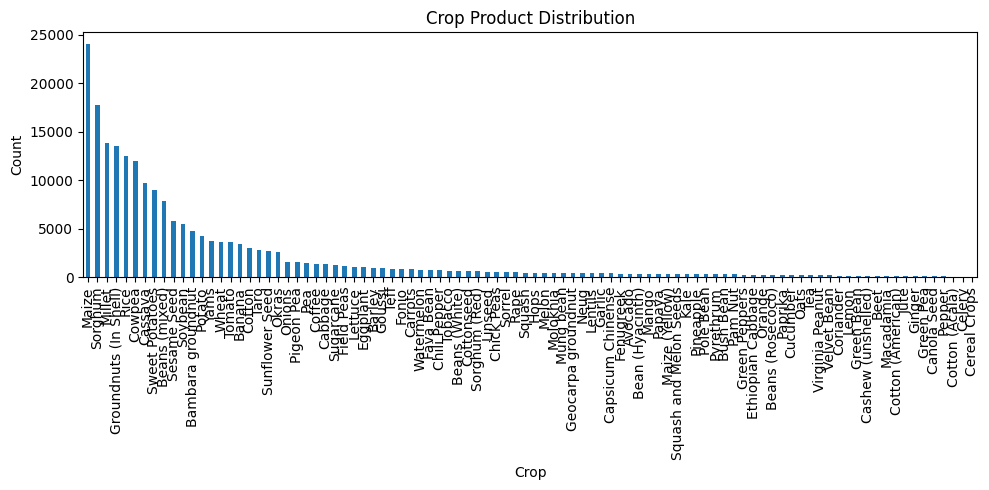

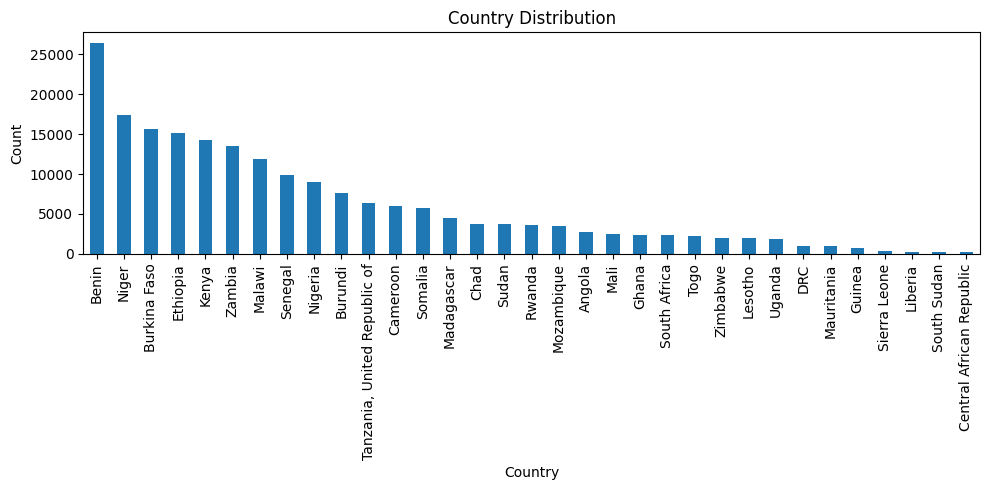

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crop distribution
plt.figure(figsize=(10, 5))
df['product'].value_counts().plot(kind='bar')
plt.title('Crop Product Distribution')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Country distribution
plt.figure(figsize=(10, 5))
df['country'].value_counts().plot(kind='bar')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\fadhl\AppData\Local\Temp\ipykernel_9132\210524839.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='planting_year', y='yield', ci=None)


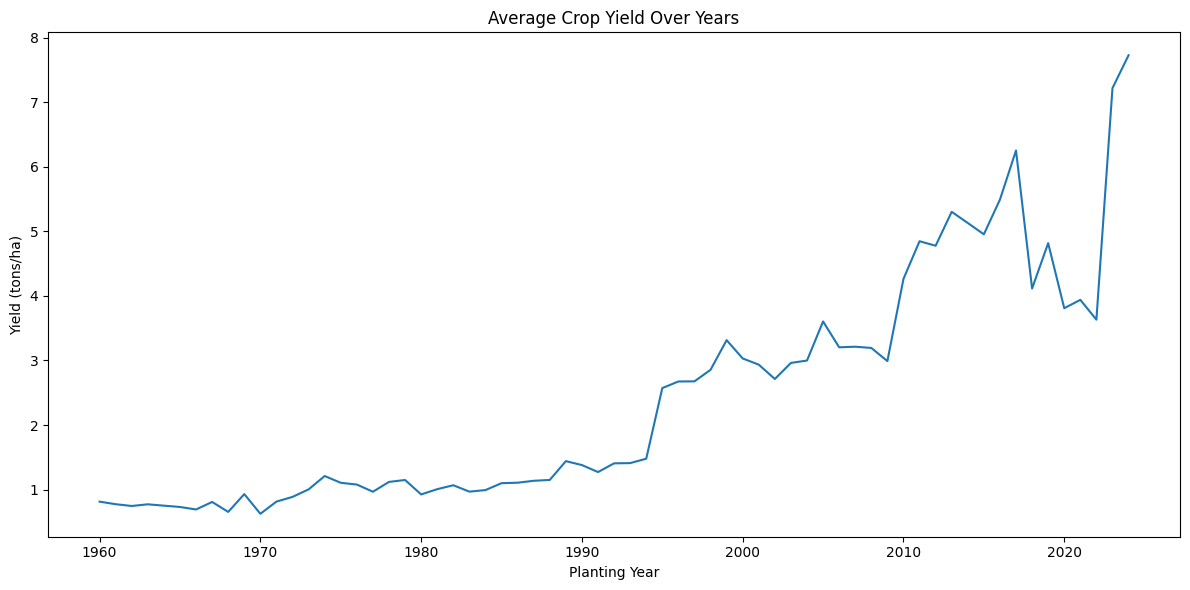

In [6]:
# Line plot: yield over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='planting_year', y='yield', ci=None)
plt.title("Average Crop Yield Over Years")
plt.xlabel("Planting Year")
plt.ylabel("Yield (tons/ha)")
plt.tight_layout()
plt.show()


In [7]:
print(df.columns)

Index(['country', 'admin_1', 'product', 'season_name', 'planting_year',
       'planting_month', 'harvest_year', 'harvest_month',
       'crop_production_system', 'area', 'production', 'yield'],
      dtype='object')


In [8]:
df = df.dropna(subset=['area', 'production', 'yield'])


In [9]:
df['growing_duration'] = (df['harvest_month'] - df['planting_month']) % 12
df['growing_duration'].replace(0, 12, inplace=True)  


C:\Users\fadhl\AppData\Local\Temp\ipykernel_9132\3171713448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['growing_duration'].replace(0, 12, inplace=True)


In [10]:
df.head()

,country,admin_1,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,area,production,yield,growing_duration
0,Angola,Bengo,Banana,Main,2007,10,2008,4,All (PS),1364.0,19588.0,14.360704,6
1,Angola,Bengo,Banana,Main,2008,10,2009,4,All (PS),1364.0,20461.0,15.000733,6
2,Angola,Bengo,Banana,Main,2014,10,2015,4,All (PS),8706.0,222044.0,25.504709,6
3,Angola,Bengo,Banana,Main,2015,10,2016,4,All (PS),8706.0,222044.0,25.504709,6
4,Angola,Bengo,Banana,Main,2016,10,2017,4,All (PS),9549.7,233967.0,24.499932,6


In [11]:
label_cols = ['country', 'admin_1', 'crop_production_system']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [12]:
one_hot_cols = ['product', 'season_name']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [13]:
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [14]:
# Separate features and target
X = df.drop('yield', axis=1)
y = df['yield']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# After fitting StandardScaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [18]:
# Assuming df_final is your cleaned DataFrame with selected features
feature_names = df.drop(columns='yield').columns.tolist()

# Then save it
import joblib
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

## LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


In [21]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print(f"Train MSE: {train_mse:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train MSE: 106.2856
Train RMSE: 10.3095
Test MSE: 114.5232
Test RMSE: 10.7016


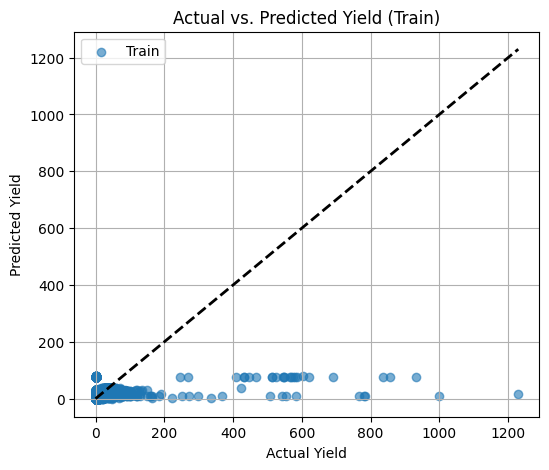

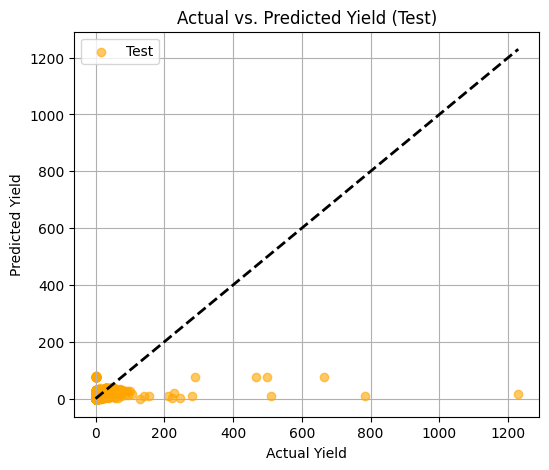

In [22]:
import matplotlib.pyplot as plt

# Training set
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Train)')
plt.legend()
plt.grid(True)
plt.show()

# Test set
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Test)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
print("Min yield:", y.min())
print("Max yield:", y.max())
print("Mean yield:", y.mean())


Min yield: 4.650297619047619e-05
Max yield: 1229.4285714285716
Mean yield: 3.580727432599835


## DECISION TREE

In [24]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)


In [26]:
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_rmse_dt = train_mse_dt ** 0.5
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_rmse_dt = test_mse_dt ** 0.5

print("Decision Tree Regressor")
print("Train MSE:", train_mse_dt)
print("Train RMSE:", train_rmse_dt)
print("Test MSE:", test_mse_dt)
print("Test RMSE:", test_rmse_dt)


Decision Tree Regressor
Train MSE: 7.874229371552676e-18
Train RMSE: 2.806105730643925e-09
Test MSE: 56.536059159590216
Test RMSE: 7.519046426215908


## RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=30,      
    max_depth=10,           
    min_samples_split=10,   
    max_features='sqrt',    
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=30, random_state=42)

In [54]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


In [55]:
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = train_mse_rf ** 0.5
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = test_mse_rf ** 0.5

print("Random Forest Regressor")
print("Train MSE:", train_mse_rf)
print("Train RMSE:", train_rmse_rf)
print("Test MSE:", test_mse_rf)
print("Test RMSE:", test_rmse_rf)


Random Forest Regressor
Train MSE: 68.17883119770575
Train RMSE: 8.2570473655966
Test MSE: 93.45749530952585
Test RMSE: 9.667341687843967


## SAVING THE BEST MODEL

In [56]:
import joblib

# Save the model with compression
joblib.dump(dt_model, 'best_model.pkl')


['best_model.pkl']

In [31]:
import joblib

# Load
feature_names = joblib.load('feature_names.pkl')

# Print all original features
print("Original features used during training:")
for feature in feature_names:
    print(feature)


Original features used during training:
country
admin_1
planting_year
planting_month
harvest_year
harvest_month
crop_production_system
area
production
growing_duration
product_Bambara groundnut
product_Banana
product_Barley
product_Bean (Hyacinth)
product_Beans (Rosecoco)
product_Beans (White)
product_Beans (mixed)
product_Beet
product_Bush Bean
product_Cabbage
product_Canola Seed
product_Capsicum Chinense
product_Carrots
product_Cashew (unshelled)
product_Cassava
product_Celery
product_Cereal Crops
product_Chick Peas
product_Chili Pepper
product_Coffee
product_Coriander
product_Cotton
product_Cotton (Acala)
product_Cotton (American)
product_Cottonseed
product_Cowpea
product_Cucumber
product_Eggplant
product_Ethiopian Cabbage
product_Fava Bean
product_Fenugreek
product_Field Peas
product_Fonio
product_Garlic
product_Geocarpa groundnut
product_Ginger
product_Goussi
product_Green Bean
product_Green Peppers
product_Groundnuts (In Shell)
product_Hops
product_Jute
product_Kale
product_Lemon

## TESTING THE MODEL

In [57]:
import numpy as np
import pandas as pd
import joblib

# Load model and preprocessors
model = joblib.load('best_model.pkl')
scaler = joblib.load(r'C:\Users\fadhl\OneDrive\Desktop\linear_regression_model\summative\API\scaler.pkl')
label_encoders = joblib.load(r'C:\Users\fadhl\OneDrive\Desktop\linear_regression_model\summative\API\label_encoders.pkl')
feature_names = joblib.load(r'C:\Users\fadhl\OneDrive\Desktop\linear_regression_model\summative\API\feature_names.pkl')

def predict_yield(input_dict):
    input_data = pd.DataFrame([input_dict])

    # Feature engineering
    input_data['growing_duration'] = (input_data['harvest_month'] - input_data['planting_month']) % 12
    input_data['growing_duration'] = input_data['growing_duration'].replace(0, 12)

    # Label encoding
    for col, le in label_encoders.items():
        value = input_data[col].values[0]
        if value in le.classes_:
            input_data[col] = le.transform([value])
        else:
            raise ValueError(f"Unknown label '{value}' in column '{col}'.")

    # One-hot encoding
    input_data = pd.get_dummies(input_data, columns=['product', 'season_name'], drop_first=True)

    # Add missing columns all at once (to avoid fragmentation warning)
    missing_cols = [col for col in feature_names if col not in input_data.columns]
    missing_df = pd.DataFrame(0, index=input_data.index, columns=missing_cols)
    input_data = pd.concat([input_data, missing_df], axis=1)

    # Ensure correct column order
    input_data = input_data[feature_names]

    # Scale and predict
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    return prediction


In [63]:
sample_input = {
    'country': 'Nigeria',
    'admin_1': 'Kano',
    'product': 'Corn',
    'season_name': 'Main',
    'planting_year': 2021,
    'planting_month': 5,
    'harvest_year': 2021,
    'harvest_month': 9,
    'crop_production_system': 'irrigated',
    'area': 51,
    'production': 2000
}

predicted_yield = predict_yield(sample_input)
print(f"Predicted yield: {predicted_yield:.2f}")

Predicted yield: 19.35
